In [62]:
import pymysql
from sklearn.ensemble import RandomForestClassifier
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pandasql import sqldf

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

In [558]:
tablon = pd.read_csv("../FEATURE_ENGINEER/tablon3.csv")[["AVG_CORNERSHOMED1_L3","AVG_CORNERSHOMED2_L5",
                                                         "AVG_CORNERSAWAYD1_L5","CORNERS_DIV_SHOTS","AVG_CORNERSAWAYD2_L5",
                                                         "LEAGUE_INGLATERRA","TOTAL_CORNERS","LAST_MINUTECORNER_H_L60",
                                                         "LEAGUE_ESPANA","CORNERS_DIV_DANGATTACKS",
                                                         "LAST_MINUTECORNER_A_L60","AVG_CORNERSHOMER2_L5",
                                                         "AVG_CORNERS_LOSE_HOME","CORNERS_A",
                                                         "AVG_CORNERSHOMER1_L3","GOALS/DANGATTACKS_L45","ODDS_AWAY",
                                                         "AVG_CORNERSHOMED1_L5","RANK_HOMELEAGUE_L5",
                                                         "NUM_MATCHESHOME_POSITIVE_L5","NUM_ATTACKSHOME_L45","DIF_ODDS",
                                                         "GOALS_A","output"]]

In [559]:
len_test = int(round(len(tablon)*0.25, 0))
len_train = int(round(len(tablon)*0.6, 0))

In [560]:
X_train = tablon[:len_train]
y_train = X_train.pop("output")
X_test = tablon[len_train:(len_train+len_test)]
y_test = X_test.pop("output")
X_validation = tablon[(len_train+len_test):]
y_validation = X_validation.pop("output")

In [561]:
X_train.shape, X_test.shape, X_validation.shape

((6919, 23), (2883, 23), (1730, 23))

In [562]:
y_train.value_counts()

1    4233
0    2686
Name: output, dtype: int64

In [563]:
y_test.value_counts()

1    1663
0    1220
Name: output, dtype: int64

In [564]:
y_validation.value_counts()

1    985
0    745
Name: output, dtype: int64

## EXECUTING BEST MODEL

In [565]:
model1 = xgb.XGBClassifier(objective='binary:logistic', n_estimators=150, max_depth=6, gamma=1.25, eta=0.015,
                          min_child_weight=30, colsample_bytree=0.65, 
                          random_state=123, eval_metric=["auc", "logloss", "error"])
model1.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.61635	validation_0-logloss:0.69154	validation_0-error:0.34859
[1]	validation_0-auc:0.61740	validation_0-logloss:0.68997	validation_0-error:0.34859
[2]	validation_0-auc:0.62752	validation_0-logloss:0.68834	validation_0-error:0.34859
[3]	validation_0-auc:0.63366	validation_0-logloss:0.68675	validation_0-error:0.34825
[4]	validation_0-auc:0.63528	validation_0-logloss:0.68528	validation_0-error:0.34859
[5]	validation_0-auc:0.63484	validation_0-logloss:0.68381	validation_0-error:0.34790
[6]	validation_0-auc:0.63318	validation_0-logloss:0.68251	validation_0-error:0.34721
[7]	validation_0-auc:0.63363	validation_0-logloss:0.68110	validation_0-error:0.34790


/home/root/opt/python3.7.11/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[8]	validation_0-auc:0.63343	validation_0-logloss:0.67982	validation_0-error:0.34756
[9]	validation_0-auc:0.63378	validation_0-logloss:0.67849	validation_0-error:0.34790
[10]	validation_0-auc:0.63516	validation_0-logloss:0.67720	validation_0-error:0.34790
[11]	validation_0-auc:0.63565	validation_0-logloss:0.67609	validation_0-error:0.34756
[12]	validation_0-auc:0.63622	validation_0-logloss:0.67486	validation_0-error:0.34756
[13]	validation_0-auc:0.63677	validation_0-logloss:0.67383	validation_0-error:0.34686
[14]	validation_0-auc:0.63648	validation_0-logloss:0.67271	validation_0-error:0.34756
[15]	validation_0-auc:0.63587	validation_0-logloss:0.67168	validation_0-error:0.34756
[16]	validation_0-auc:0.63661	validation_0-logloss:0.67070	validation_0-error:0.34756
[17]	validation_0-auc:0.63719	validation_0-logloss:0.66974	validation_0-error:0.34756
[18]	validation_0-auc:0.63768	validation_0-logloss:0.66885	validation_0-error:0.34721
[19]	validation_0-auc:0.63903	validation_0-logloss:0.667

[104]	validation_0-auc:0.64753	validation_0-logloss:0.63718	validation_0-error:0.34651
[105]	validation_0-auc:0.64728	validation_0-logloss:0.63711	validation_0-error:0.34651
[106]	validation_0-auc:0.64719	validation_0-logloss:0.63705	validation_0-error:0.34651
[107]	validation_0-auc:0.64692	validation_0-logloss:0.63694	validation_0-error:0.34651
[108]	validation_0-auc:0.64692	validation_0-logloss:0.63683	validation_0-error:0.34651
[109]	validation_0-auc:0.64714	validation_0-logloss:0.63674	validation_0-error:0.34617
[110]	validation_0-auc:0.64715	validation_0-logloss:0.63666	validation_0-error:0.34617
[111]	validation_0-auc:0.64716	validation_0-logloss:0.63659	validation_0-error:0.34651
[112]	validation_0-auc:0.64726	validation_0-logloss:0.63651	validation_0-error:0.34617
[113]	validation_0-auc:0.64705	validation_0-logloss:0.63643	validation_0-error:0.34617
[114]	validation_0-auc:0.64689	validation_0-logloss:0.63638	validation_0-error:0.34617
[115]	validation_0-auc:0.64673	validation_0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65,
              enable_categorical=False, eta=0.015,
              eval_metric=['auc', 'logloss', 'error'], gamma=1.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0149999997, max_delta_step=0, max_depth=6,
              min_child_weight=30, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [566]:
model2 = xgb.XGBClassifier(objective='binary:logistic', n_estimators=150, max_depth=6, gamma=1.25, eta=0.015,
                          min_child_weight=30, colsample_bytree=0.65, scale_pos_weight=0.8,
                          random_state=123, eval_metric=["auc", "logloss", "error"])
model2.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.61635	validation_0-logloss:0.69180	validation_0-error:0.34859
[1]	validation_0-auc:0.62224	validation_0-logloss:0.69045	validation_0-error:0.34929
[2]	validation_0-auc:0.62792	validation_0-logloss:0.68908	validation_0-error:0.34859
[3]	validation_0-auc:0.63343	validation_0-logloss:0.68771	validation_0-error:0.34859
[4]	validation_0-auc:0.63408	validation_0-logloss:0.68639	validation_0-error:0.34859
[5]	validation_0-auc:0.63713	validation_0-logloss:0.68510	validation_0-error:0.34964
[6]	validation_0-auc:0.63558	validation_0-logloss:0.68394	validation_0-error:0.34929
[7]	validation_0-auc:0.63594	validation_0-logloss:0.68267	validation_0-error:0.34998
[8]	validation_0-auc:0.63574	validation_0-logloss:0.68156	validation_0-error:0.34998
[9]	validation_0-auc:0.63665	validation_0-logloss:0.68040	validation_0-error:0.34998
[10]	validation_0-auc:0.63740	validation_0-logloss:0.67928	validation_0-error:0.34964
[11]	validation_0-auc:0.63721	validation_0-logloss:0.67828	valid

[96]	validation_0-auc:0.64641	validation_0-logloss:0.64104	validation_0-error:0.34651
[97]	validation_0-auc:0.64653	validation_0-logloss:0.64087	validation_0-error:0.34686
[98]	validation_0-auc:0.64660	validation_0-logloss:0.64073	validation_0-error:0.34686
[99]	validation_0-auc:0.64686	validation_0-logloss:0.64054	validation_0-error:0.34721
[100]	validation_0-auc:0.64649	validation_0-logloss:0.64044	validation_0-error:0.34721
[101]	validation_0-auc:0.64670	validation_0-logloss:0.64025	validation_0-error:0.34721
[102]	validation_0-auc:0.64685	validation_0-logloss:0.64006	validation_0-error:0.34721
[103]	validation_0-auc:0.64682	validation_0-logloss:0.63994	validation_0-error:0.34790
[104]	validation_0-auc:0.64688	validation_0-logloss:0.63979	validation_0-error:0.34686
[105]	validation_0-auc:0.64690	validation_0-logloss:0.63969	validation_0-error:0.34756
[106]	validation_0-auc:0.64685	validation_0-logloss:0.63958	validation_0-error:0.34686
[107]	validation_0-auc:0.64696	validation_0-log

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65,
              enable_categorical=False, eta=0.015,
              eval_metric=['auc', 'logloss', 'error'], gamma=1.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0149999997, max_delta_step=0, max_depth=6,
              min_child_weight=30, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=0.8, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<AxesSubplot:>

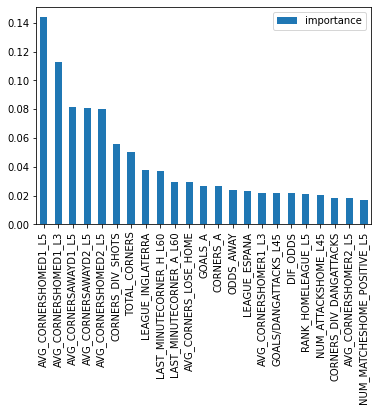

In [567]:
fu_dict = dict(zip(X_train.columns, model1.feature_importances_))
fi = pd.DataFrame(fu_dict.values(), index=fu_dict.keys(), columns=["importance"])
fi = fi.sort_values(by="importance", ascending=False)
fi = fi[fi.importance > 0.01]

fi.plot.bar()

In [134]:
fi.to_csv("feature_importance.csv")

In [568]:
y_pred1 = model1.predict(X_test)
confusion_matrix(y_test, y_pred1)

array([[ 322,  898],
       [  98, 1565]])

In [569]:
y_pred2 = model2.predict(X_test)
confusion_matrix(y_test, y_pred2)

array([[ 352,  868],
       [ 127, 1536]])

In [584]:
y_pred_proba = model1.predict_proba(X_test)[:,1]
predict_mine = np.where(y_pred_proba > 0.657, 1, 0)
cm1 = confusion_matrix(y_test, predict_mine)

In [585]:
y_pred_proba = model2.predict_proba(X_test)[:,1]
predict_mine = np.where(y_pred_proba > 0.62, 1, 0)
cm2 = confusion_matrix(y_test, predict_mine)

In [586]:
metrics.accuracy_score(y_test, y_pred1), metrics.accuracy_score(y_test, y_pred2)

(0.6545265348595213, 0.654873395768297)

In [587]:
cm1[1][1]/(cm1[1][1]+cm1[0][1]), cm2[1][1]/(cm2[1][1]+cm2[0][1])

(0.7032332563510393, 0.7065527065527065)

In [588]:
(cm1[1][1]+cm1[0][1])/len(y_validation)*100, (cm2[1][1]+cm2[0][1])/len(y_validation)*100

(50.05780346820809, 40.578034682080926)

# VALIDATION - BEST MODEL --> 70% accuracy in 17% of matches

In [578]:
y_pred = model1.predict(X_validation)
confusion_matrix(y_validation, y_pred)

array([[190, 555],
       [ 56, 929]])

In [579]:
metrics.accuracy_score(y_validation, y_pred)

0.6468208092485549

In [580]:
y_pred_proba = model1.predict_proba(X_validation)[:,1]
predict_mine = np.where(y_pred_proba > 0.665, 1, 0)
cm1 = confusion_matrix(y_validation, predict_mine)

In [581]:
y_pred_proba = model2.predict_proba(X_validation)[:,1]
predict_mine = np.where(y_pred_proba > 0.62, 1, 0)
cm2=confusion_matrix(y_validation, predict_mine)

In [582]:
cm1[1][1]/(cm1[1][1]+cm1[0][1]), cm2[1][1]/(cm2[1][1]+cm2[0][1])

(0.7003367003367004, 0.6895424836601307)

In [583]:
(cm1[1][1]+cm1[0][1])/len(y_validation)*100, (cm2[1][1]+cm2[0][1])/len(y_validation)*100

(17.167630057803468, 17.6878612716763)